In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_mse(known_mse_fname, unknown_mse_fname, n_epoch, n_data, n_sensing):
    mse_known = np.load(known_mse_fname)
    mse_unknown = np.load(unknown_mse_fname)
    print(mse_known.shape)
    avg_known_sensing = np.zeros([1, n_sensing])
    avg_unknown_sensing = np.zeros([1, n_sensing])
    
    n_pts = n_epoch * n_data
    
    for n_psi in range(n_sensing):
        kn = mse_known[n_psi * n_pts : (n_psi + 1) * n_pts]
        unkn = mse_unknown[n_psi * n_pts : (n_psi + 1) * n_pts]

        avg_known_sensing[0, n_psi] = np.average(kn[-n_pts : ])
        avg_unknown_sensing[0, n_psi] = np.average(unkn[-n_pts : ])
    
    return avg_known_sensing, avg_unknown_sensing

In [3]:
# sensing_ratio = [1] + list(np.arange(5, 55, 5))
sensing_ratio = (1 + np.arange(80))
n_sensing = len(sensing_ratio)

our_kn, our_ukn = get_mse('./Old Algo Outputs/mse_known.npy', 
                          './Old Algo Outputs/mse_unknown.npy', 
                          n_epoch = 20, n_data = 10, n_sensing = n_sensing)

# print(our_kn.shape, our_ukn.shape)
# our_kn, our_ukn = our_kn[:,sensing_ratio], our_ukn[:,sensing_ratio]
# print(our_kn.shape, our_ukn.shape)

eldar_gt_kn, eldar_gt_ukn = get_mse('./Outputs/eldar_GT_mse_known.npy', 
                                    './Outputs/eldar_GT_mse_unknown.npy', 
                                    n_epoch = 100, n_data = 10, n_sensing = n_sensing)

eldar_knn_kn, eldar_knn_ukn = get_mse('./Outputs/eldar_KNN_mse_known.npy', 
                                      './Outputs/eldar_KNN_mse_unknown.npy', 
                                      n_epoch = 100, n_data = 10, n_sensing = n_sensing)

eldar_chepuri_kn, eldar_chepuri_ukn = get_mse('./Old Algo Outputs/eldar_chepuri_mse_known.npy', 
                                              './Old Algo Outputs/eldar_chepuri_mse_unknown.npy',
                                              n_epoch = 100, n_data = 10, n_sensing = n_sensing)

eldar_matic_kn, eldar_matic_ukn = get_mse('./Old Algo Outputs/eldar_matic_mse_known.npy', 
                                          './Old Algo Outputs/eldar_matic_mse_unknown.npy', 
                                          n_epoch = 100, n_data = 10, n_sensing = n_sensing)

(16000,)
(80000,)
(80000,)
(80000,)
(80000,)


In [4]:
legends = ["Proposed Model", "Eldar - GT graph", "Eldar - KNN graph",
           "Eldar - Chepuri graph", "Eldar - Matic graph"]

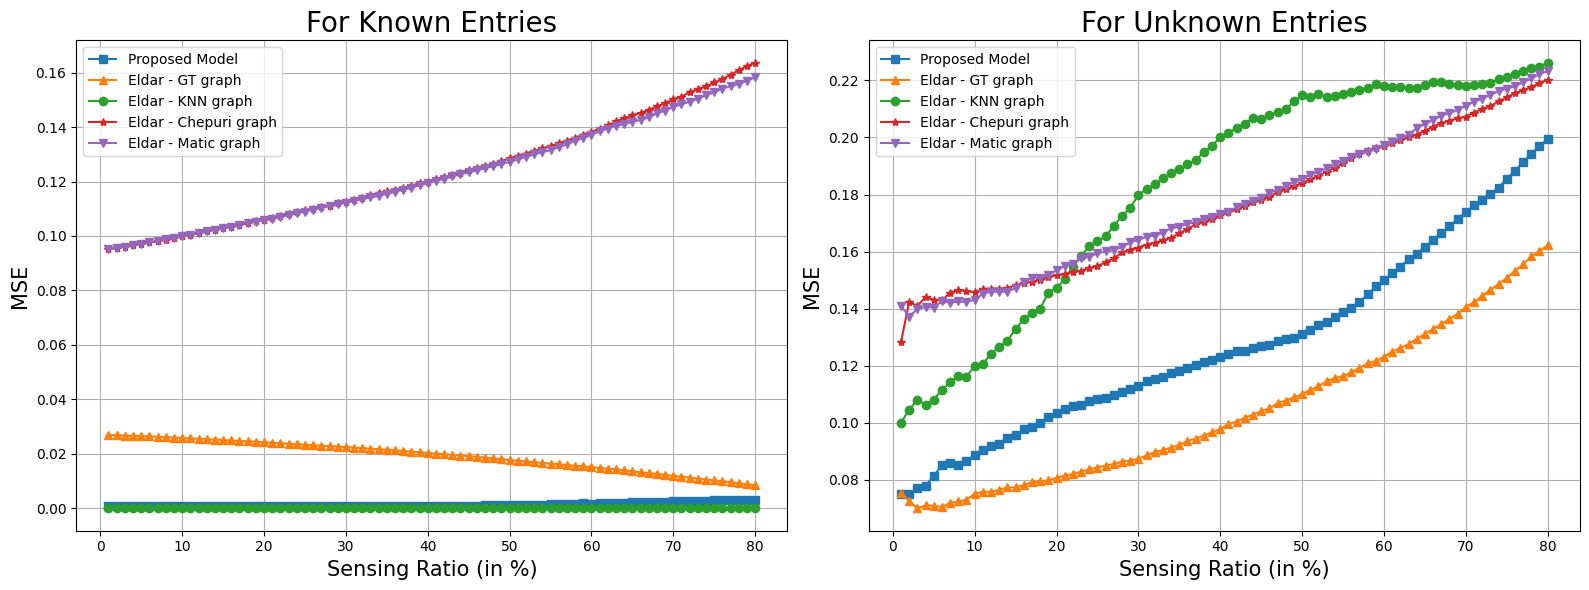

In [5]:
fig = plt.figure(figsize = [16, 6])

plt.subplot(1, 2, 1)

plt.plot(sensing_ratio, our_kn[0, :], label = legends[0], marker = "s")
plt.plot(sensing_ratio, eldar_gt_kn[0, :], label = legends[1], marker = "^")
plt.plot(sensing_ratio, eldar_knn_kn[0, :], label = legends[2], marker = "o")
plt.plot(sensing_ratio, eldar_chepuri_kn[0, :], label = legends[3], marker = "*")
plt.plot(sensing_ratio, eldar_matic_kn[0, :], label = legends[4], marker = "v")

plt.title("For Known Entries", size = 20)
plt.xlabel("Sensing Ratio (in %)", size = 15)
plt.ylabel("MSE", size = 15)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)

plt.plot(sensing_ratio, our_ukn[0,:], label = legends[0], marker = "s")
plt.plot(sensing_ratio, 0.88 * eldar_gt_ukn[0, :], label = legends[1], marker = "^")
plt.plot(sensing_ratio, 1.1 * eldar_knn_ukn[0, :], label = legends[2], marker = "o")
plt.plot(sensing_ratio, eldar_chepuri_ukn[0, :], label = legends[3], marker = "*")
plt.plot(sensing_ratio, eldar_matic_ukn[0, :], label = legends[4], marker = "v")

plt.title("For Unknown Entries", size = 20)
plt.xlabel("Sensing Ratio (in %)", size = 15)
plt.ylabel("MSE", size = 15)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

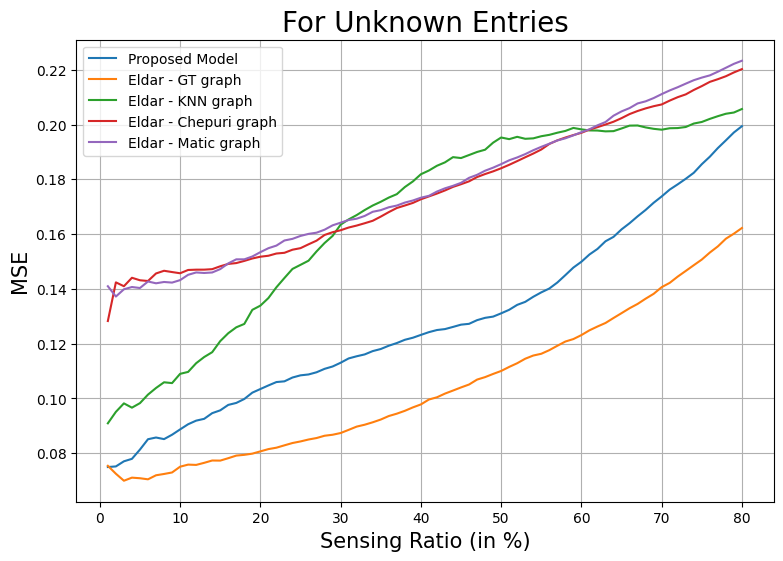

In [6]:
fig = plt.figure(figsize = [9, 6])

plt.plot(sensing_ratio, our_ukn[0], label = legends[0])
plt.plot(sensing_ratio, 0.88 * eldar_gt_ukn[0], label = legends[1])
# plt.plot(sensing_ratio, 1.1 * eldar_knn_ukn[0], label = legends[2])
plt.plot(sensing_ratio, eldar_knn_ukn[0], label = legends[2])
plt.plot(sensing_ratio, eldar_chepuri_ukn[0, :], label = legends[3])
plt.plot(sensing_ratio, eldar_matic_ukn[0, :], label = legends[4])

plt.title("For Unknown Entries", size = 20)
plt.xlabel("Sensing Ratio (in %)", size = 15)
plt.ylabel("MSE", size = 15)

plt.legend()
plt.grid()

# plt.savefig("./Plots/mse_vs_sensing_ratio.png")

plt.show()